## Importing required libraries

In [2]:
!pip install xgboost

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

from scipy.stats import zscore, boxcox

import statsmodels.formula.api as smf

from collections import Counter

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV



from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVR

from sklearn.neighbors import KNeighborsRegressor

from xgboost import XGBRegressor



from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


import pickle

import warnings
warnings.filterwarnings('ignore')

In [5]:
#storing the file path/ url path in a variable
url = "https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv"

#make dataframe of the data
df0 = pd.read_csv(url)

## 01. Checking the data using .head(), .sample(n), .shape, features' dtypes using .info()

In [6]:
#read top 5 rows of the data
df0.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [7]:
#read last 5 rows of the data
df0.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [8]:
#checking shape & datatypes of the columns in data...
print(df0.shape)
print(' ')
print(df0.dtypes)

(30, 17)
 
W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object


In [9]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


### data set has 30 rows and 17 columns

## 02. Checking for duplicate entries

In [10]:
df0.duplicated().sum()

0

### there is no duplicate values in this data set

## 03. Checking for descriptive statistics.

In [11]:
df0.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


## observation
#### 1 all data are continuous 
#### 2Win is our target value 

## 04. Checking for missing & null values..

In [12]:
#total missing values
df0.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [13]:
#counting total vaues of 0/zero entries in data...
df0[df0 ==0].count()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     3
SHO    0
SV     0
E      0
dtype: int64

### there is no null values in this data set

## 05. Checking entries with ZERO Value.

In [15]:
#counting total vaues of 0/zero entries in data...
df0[df0 ==0].count()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     3
SHO    0
SV     0
E      0
dtype: int64

### there is no Zero entries in this data set

# EDA : Numerical Feature Analysis

In [16]:
#Copying dataframe
df1 = df0.copy()

## 06. Data Visualization.

## 1 

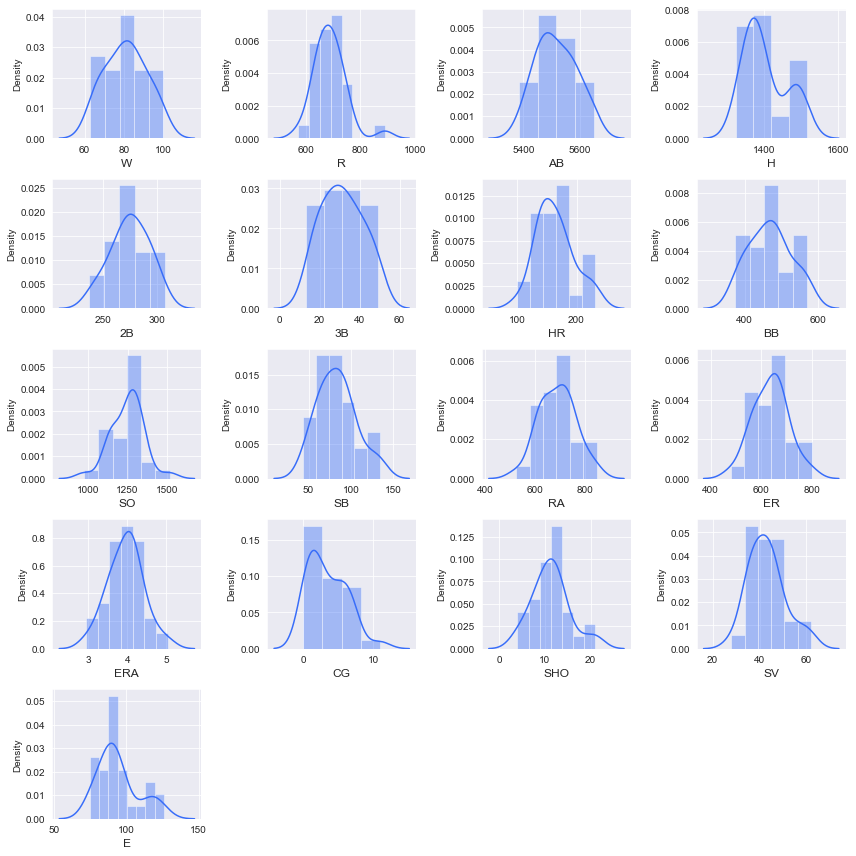

In [24]:
#distribution of numerical features.. 
i=0
plt.figure(figsize=(12,12))
for column in df1[['W','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','E']].columns:
    plt.subplot(5,4,i+1)
    sns.distplot(df1[column])
    plt.xlabel(column,fontsize=12)
    i+=1
    
plt.tight_layout()

## 2.

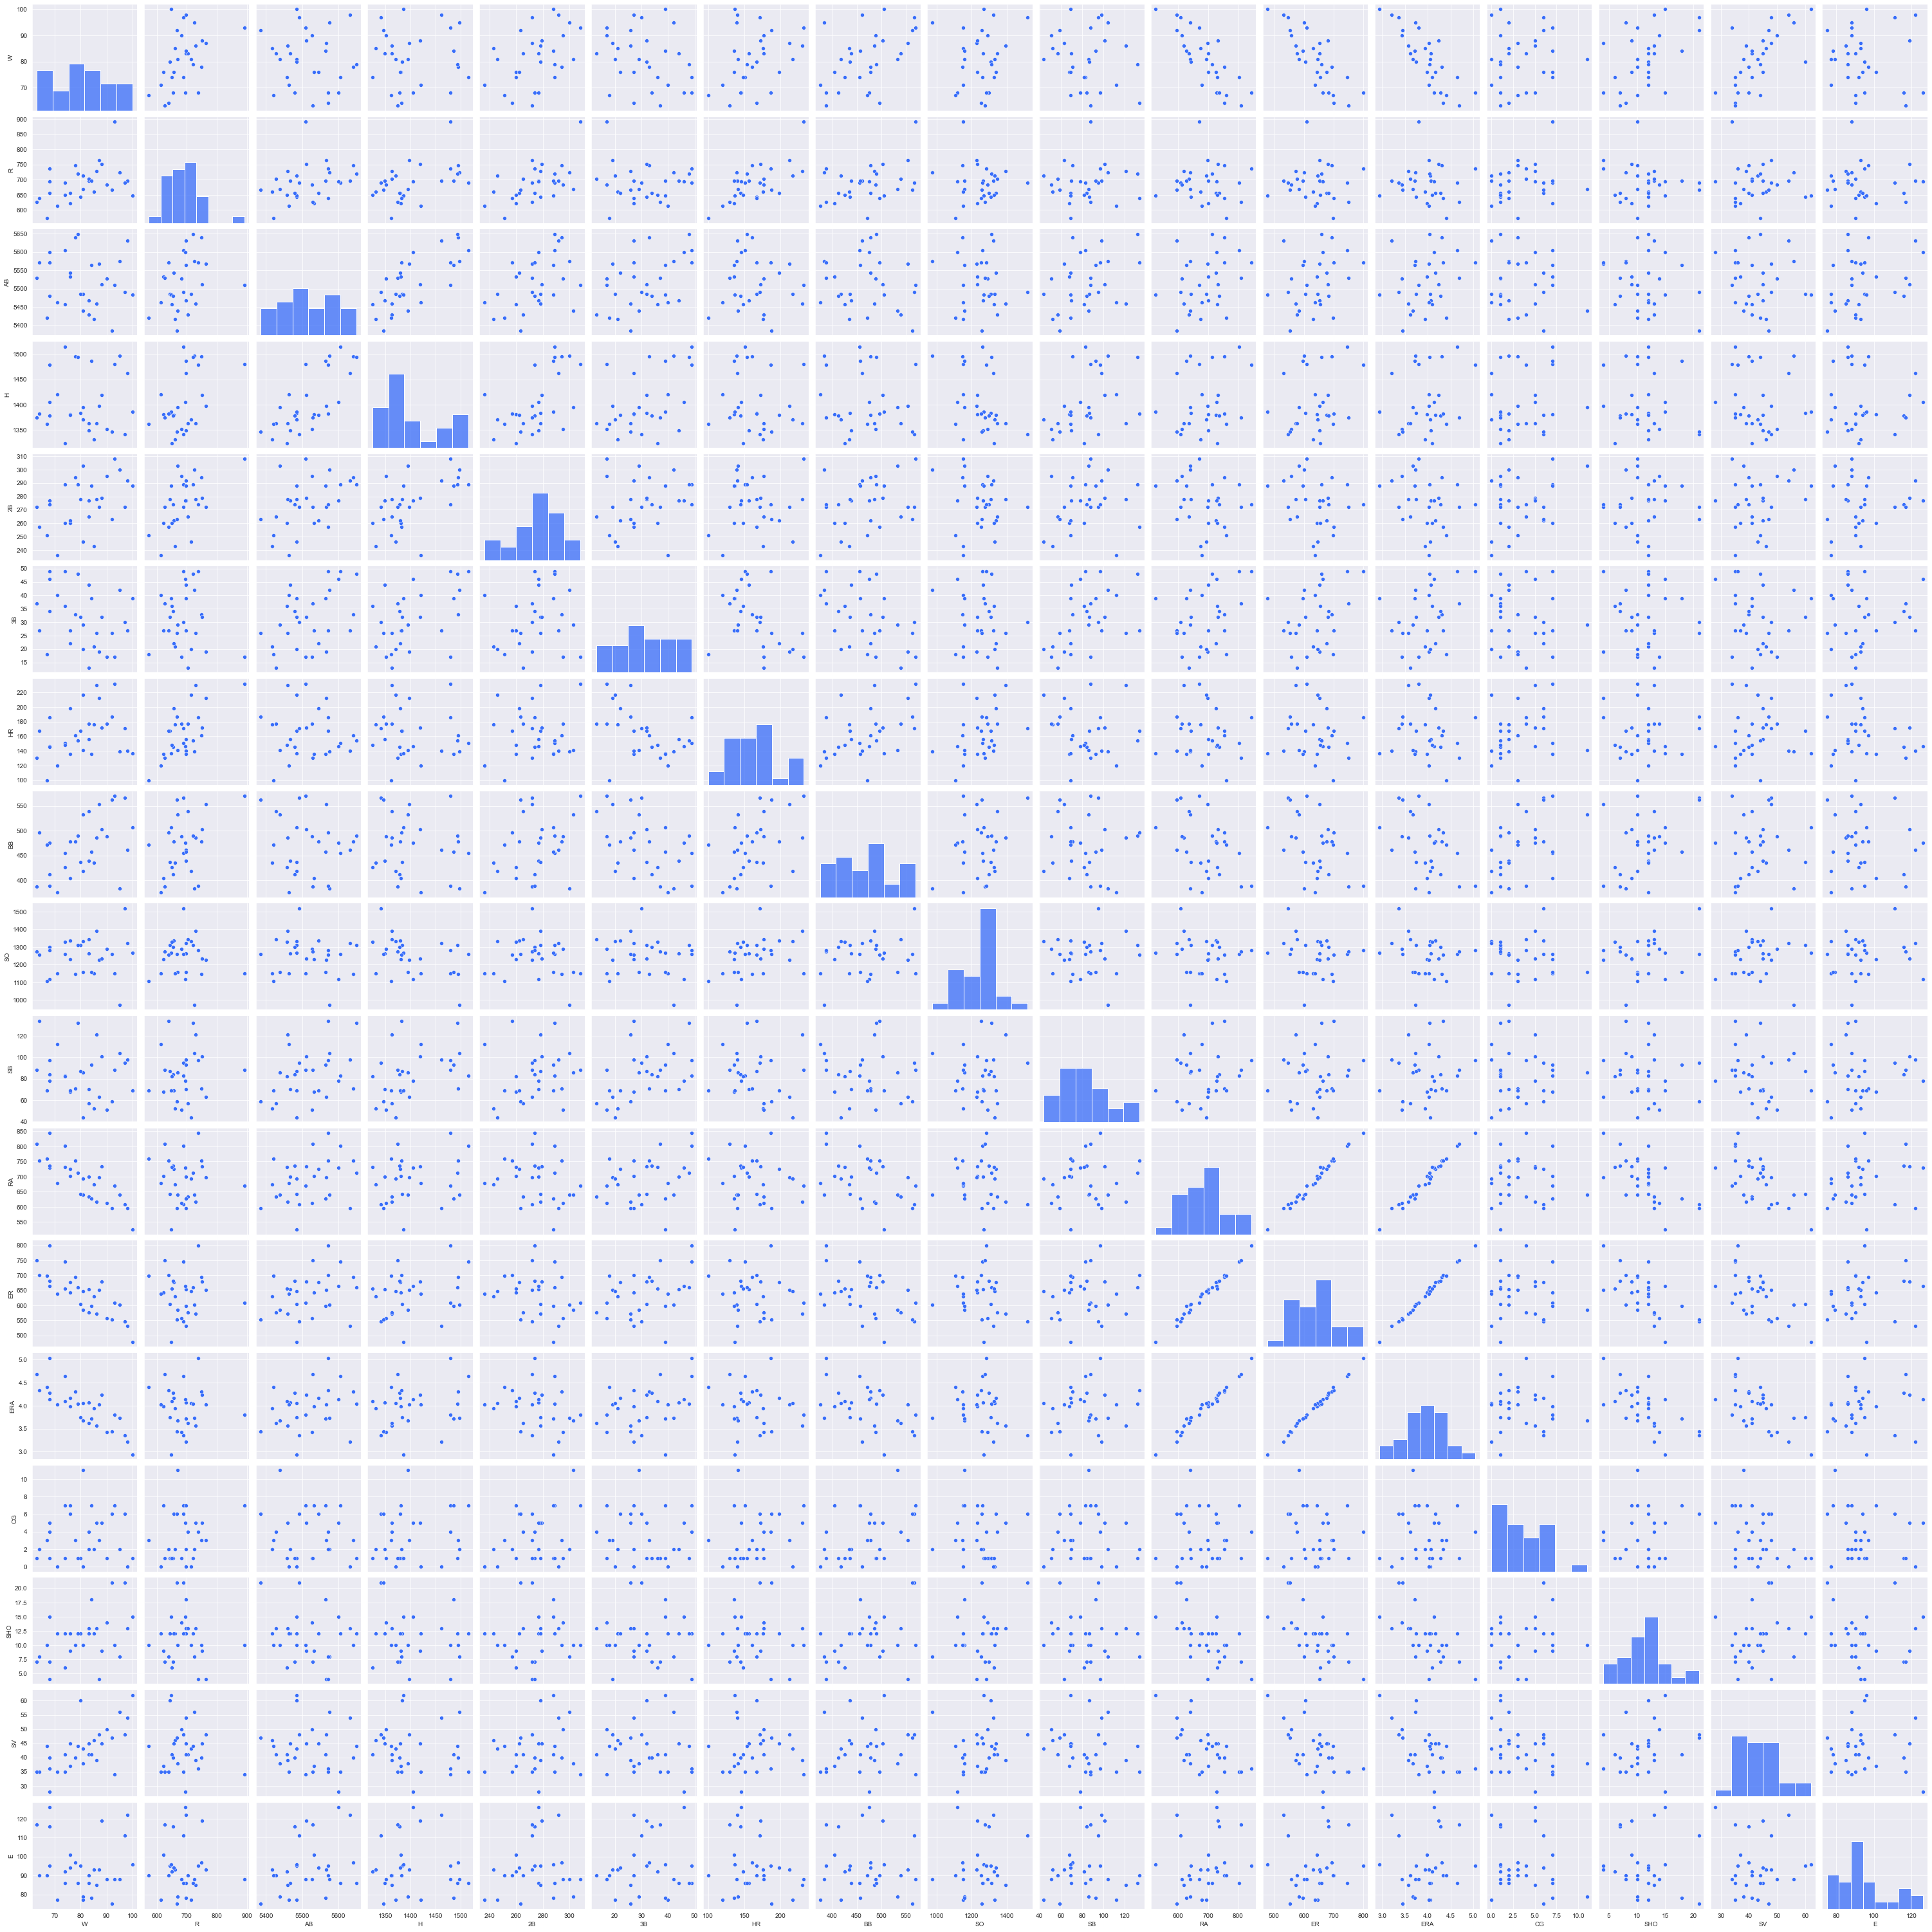

In [19]:
sns.set_palette('rainbow')
sns.pairplot(df1)

## 07. Checking outliers..

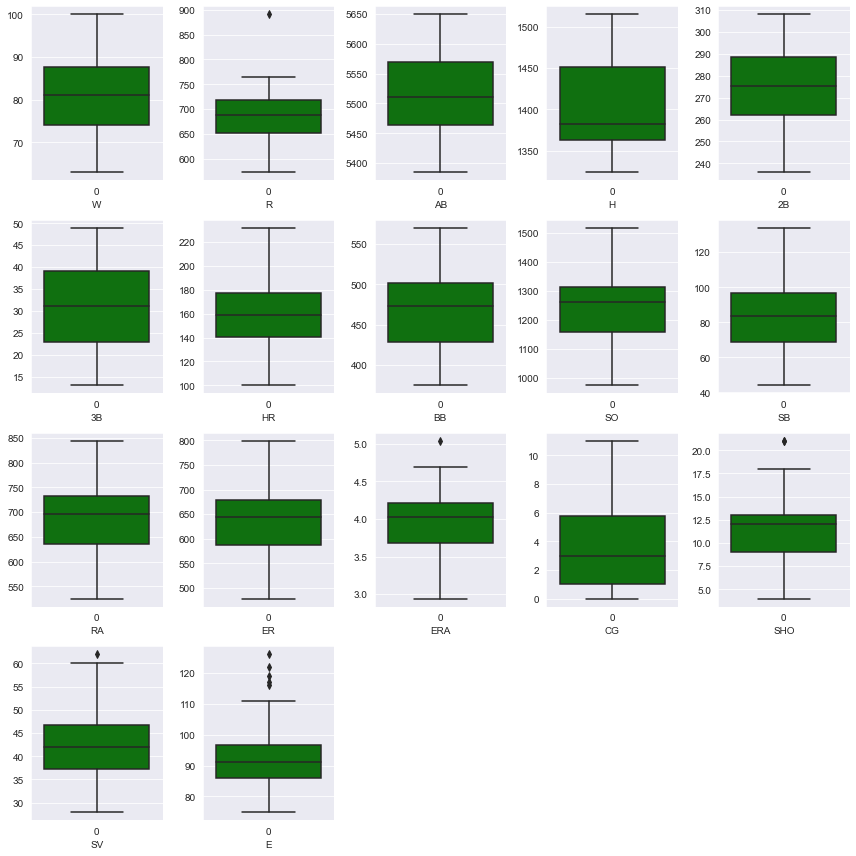

In [23]:
collist=df1[['W','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','E']].columns.values

plt.figure(figsize=(12,12))
for i in range(0,17):
    plt.subplot(4,5,i+1)
    sns.boxplot(data=df1[collist[i]],color='green',orient='v').set(xlabel=collist[i])
    plt.tight_layout()

In [26]:
df2 = df1.copy()

In [27]:
z=np.abs(zscore(df2))
df3=df2[(z<3).all(axis=1)]
data_loss=((df2.shape[0]-df3.shape[0])/df2.shape[0])*100
print("data loss ", data_loss, " %")

data loss  3.3333333333333335  %


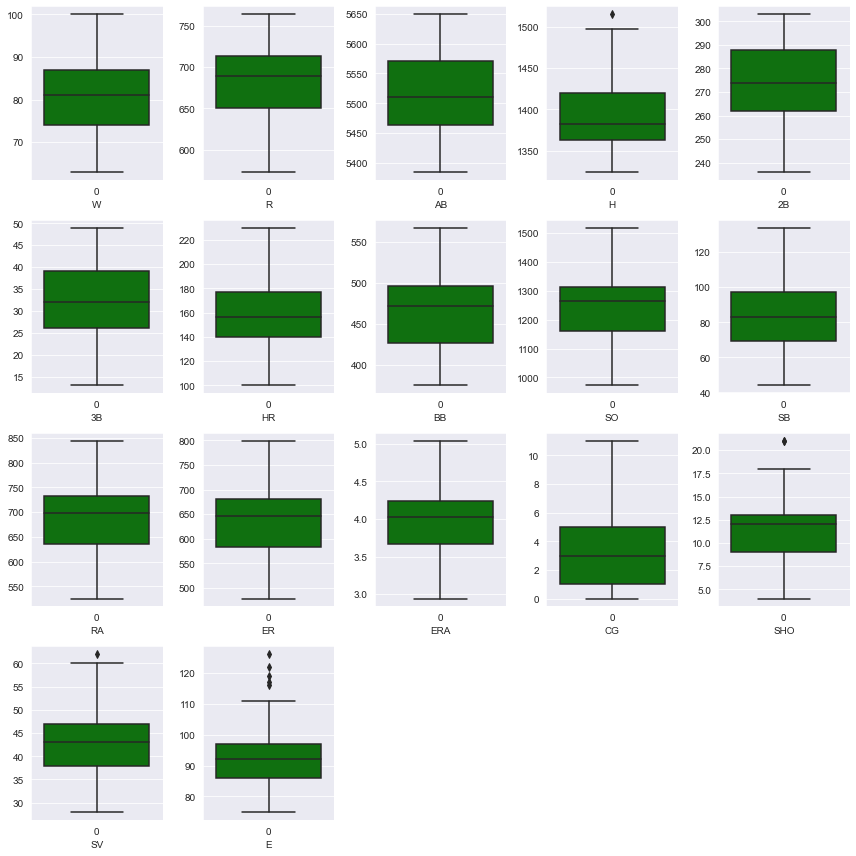

In [28]:
collist=df3[['W','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','E']].columns.values

plt.figure(figsize=(12,12))
for i in range(0,17):
    plt.subplot(4,5,i+1)
    sns.boxplot(data=df3[collist[i]],color='green',orient='v').set(xlabel=collist[i])
    plt.tight_layout()

## 08. Checking Skewness..

In [29]:
df3.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [30]:
df3.shape

(29, 17)

In [31]:
df3.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

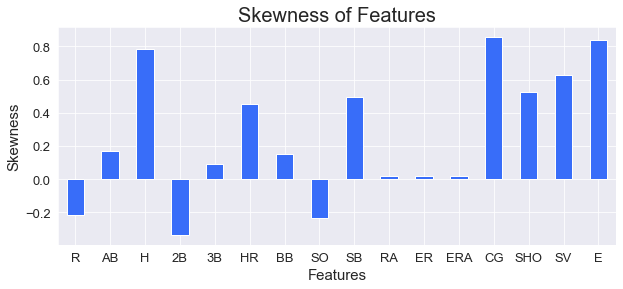

In [32]:
plt.figure(figsize=(10,4))
df3.skew().drop(['W']).plot(kind='bar', rot = 0, fontsize=13)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Skewness', fontsize=15)
plt.title('Skewness of Features', fontsize=20)
plt.show()

In [33]:
df4 = df3.copy()

In [38]:
df4['H']=boxcox(df4['H'],0.5)

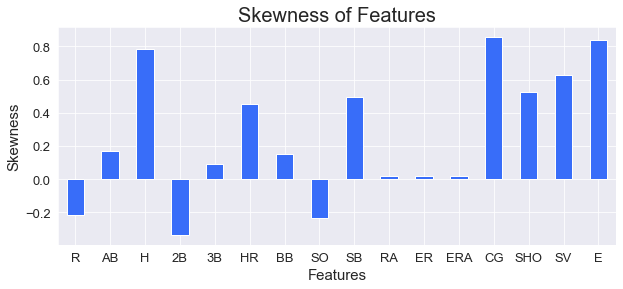

In [40]:
plt.figure(figsize=(10,4))
df3.skew().drop(['W']).plot(kind='bar', rot = 0, fontsize=13)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Skewness', fontsize=15)
plt.title('Skewness of Features', fontsize=20)
plt.show()

# 09. Checking Correlation & Multicollinearity...

## Correlation..

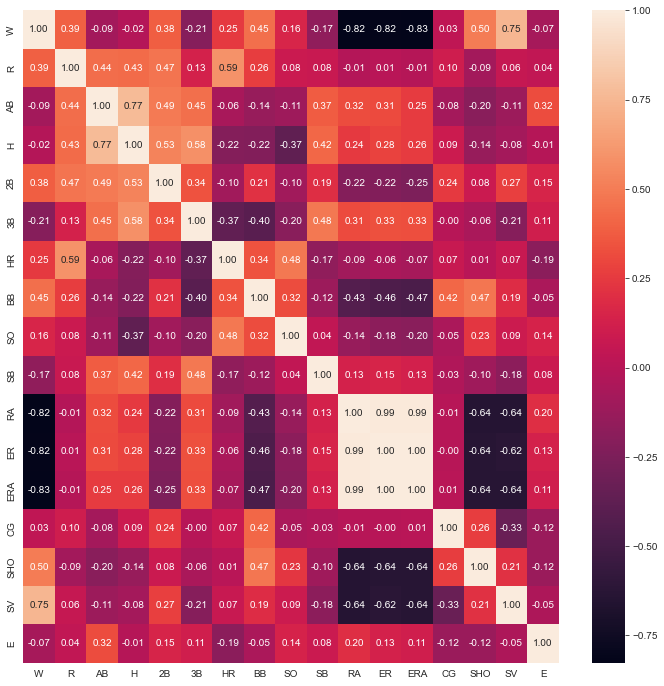

In [42]:
#Heatmap of numerical columns
plt.figure(figsize = (12,12))
sns.heatmap(df4[['W','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','E']].corr(),annot=True, fmt = ".2f")
plt.show()

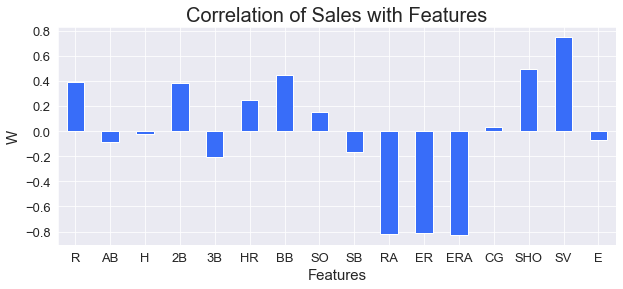

In [43]:
plt.figure(figsize=(10,4))
df4.corr()['W'].drop(['W']).plot(kind='bar', rot = 0, fontsize=13)
plt.xlabel('Features', fontsize=15)
plt.ylabel('W', fontsize=15)
plt.title('Correlation of Sales with Features', fontsize=20)
plt.show()

In [44]:
df4.corr()['W']

W      1.000000
R      0.390451
AB    -0.085780
H     -0.020189
2B     0.384886
3B    -0.206737
HR     0.245697
BB     0.447513
SO     0.156469
SB    -0.169503
RA    -0.823176
ER    -0.815308
ERA   -0.826952
CG     0.029594
SHO    0.497526
SV     0.749290
E     -0.072858
Name: W, dtype: float64

## Multicoliinearity..

In [46]:
#checking for multicollinearity by using vif
scaler = StandardScaler()
features = df4.drop('W',axis=1)
scaled = scaler.fit_transform(features)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(scaled, i)for i in range(len(features.columns))]
vif['features']=features.columns
vif.set_index('features', inplace=True)

<Figure size 720x288 with 0 Axes>

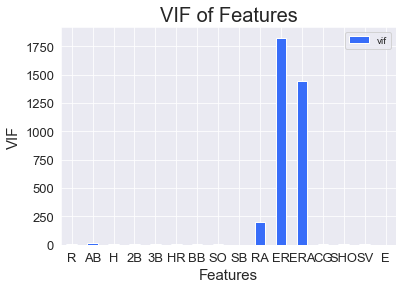

In [47]:
plt.figure(figsize=(10,4))
vif.plot(kind='bar', rot = 0, fontsize=13)
plt.xlabel('Features', fontsize=15)
plt.ylabel('VIF', fontsize=15)
plt.title('VIF of Features', fontsize=20)
plt.show()

In [48]:
vif

,vif
features,
R,7.158248
AB,18.452431
H,10.502977
2B,3.743968
3B,3.279509
HR,8.412465
BB,3.411293
SO,2.721819
SB,2.107764


## As column RA ER ERA has high vif, we are droping these column

In [51]:
df4.drop(['RA','ER','ERA'], axis=1, inplace=True)

## 10. Checking distribution for cleaned data

In [52]:
df5 = df4.copy()

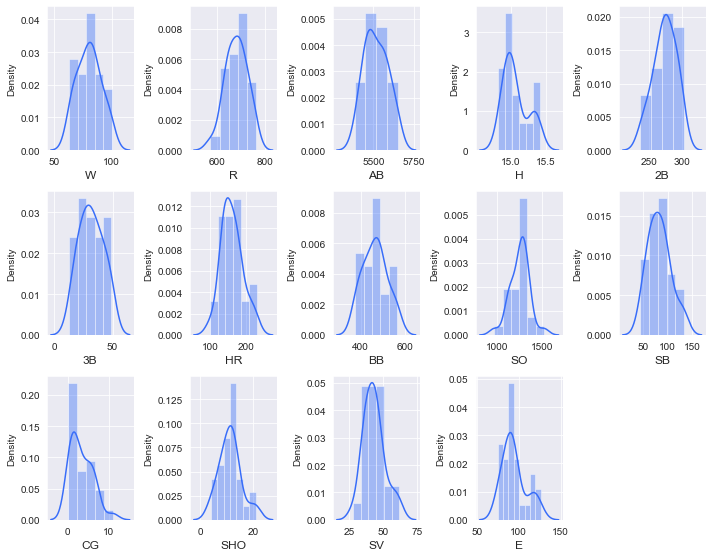

In [54]:
i=0
plt.figure(figsize=(10,10))
for column in df5[['W','R','AB','H','2B','3B','HR','BB','SO','SB','CG','SHO','SV','E']].columns:
    plt.subplot(4,5,i+1)
    sns.distplot(df5[column])
    plt.xlabel(column,fontsize=12)
    i+=1
    
plt.tight_layout()

## 11. Preparing data for ML model

## Applying StandardScaler..

In [56]:
x = df5.drop(columns=['W'])
y = df5['W']

In [57]:
Scaler = StandardScaler()
X_scaled = pd.DataFrame(Scaler.fit_transform(x), columns=x.columns)

In [58]:
X_scaled.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
0,0.959398,0.830084,1.727320,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.501486,-0.813262,1.643157,-0.471091
1,0.331147,-0.702831,-0.947163,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,-0.501486,0.159299,0.211006,-0.614898
2,-0.274666,-1.100253,-0.093082,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,2.854612,-0.326982,-0.700362,-1.118222
3,-1.329231,0.233951,-0.350734,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,1.363013,-0.570122,-0.830557,0.463653
4,0.174084,1.255894,2.038751,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.363013,0.159299,-1.090948,-0.614898


### Checking distribution after scaling..

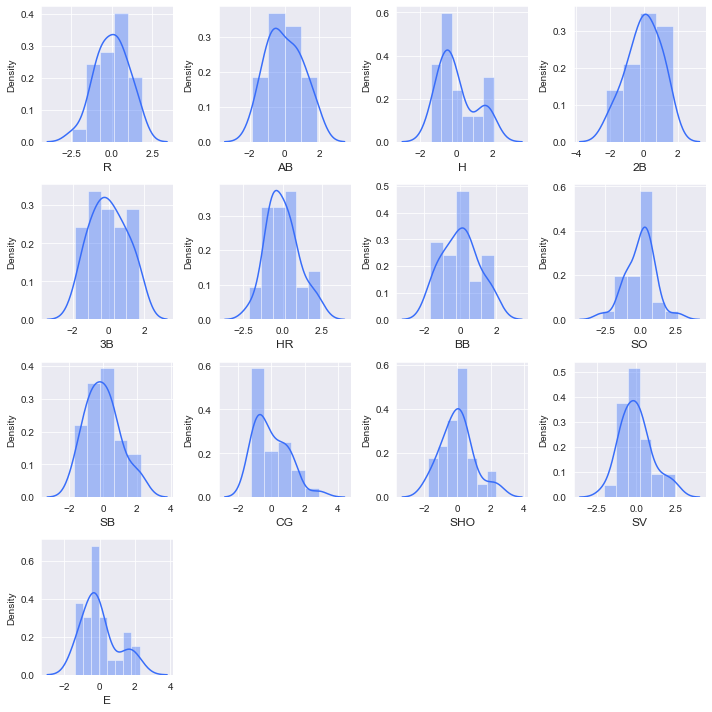

In [61]:
i=0
plt.figure(figsize=(10,10))
for column in X_scaled[['R','AB','H','2B','3B','HR','BB','SO','SB','CG','SHO','SV','E']].columns:
    plt.subplot(4,4,i+1)
    sns.distplot(X_scaled[column])
    plt.xlabel(column,fontsize=12)
    i+=1
    
plt.tight_layout()

## Checking for Linear Regression algorithm.   Finding random state to get best split for traing & testing sets

In [63]:
lr = LinearRegression()
train = []
test = []
diff = []
randomstate = []
for i in range(0, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = i)
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)

    train.append(r2_score(y_train, pred_train))
    test.append(r2_score(y_test, pred_test))
    diff.append(r2_score(y_train, pred_train) - r2_score(y_test, pred_test))
    randomstate.append(i)
    
table = pd.DataFrame(list(zip(randomstate, train, test, diff)),
                              columns =['randomstate', 'train_score', 'test_score', 'diff_score'])
#                               index=pd.RangeIndex(start=1, stop=(len(randomstate)+1), name='Sr. No.'))

In [82]:
table[(-0.5 < table['diff_score']) & (table['diff_score'] <0.5)].sort_values(by=['diff_score', 'train_score', 'test_score'])

,randomstate,train_score,test_score,diff_score
67,67,0.769773,0.814133,-0.044360
76,76,0.757169,0.794384,-0.037215
53,53,0.781710,0.813303,-0.031592
82,82,0.820434,0.845834,-0.025399
32,32,0.754290,0.776993,-0.022702
...,...,...,...,...
99,99,0.793451,0.342347,0.451104
64,64,0.918508,0.457170,0.461338
10,10,0.898598,0.429411,0.469187
49,49,0.835174,0.339305,0.495868


### best random is 32 for spliting

## Training the model..

In [67]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, random_state=32, test_size=.25)

===scores for training set===
r2 score for training set 0.9281586566624451
MAE for training set:  1.909379405276329
MSE for training set:  5.987756044705598
SMSE for training set:  2.4469891795236034
 
===scores for testing set===
r2 score for testing set :  0.3395311666235842
MAE for testing set:  7.417053605348428
MSE for testing set:  100.34998337112918
SMSE for testing set:  10.017483884246042


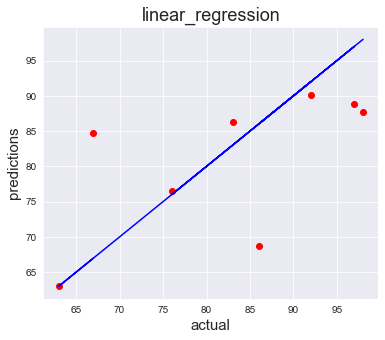

In [83]:
lr = LinearRegression()
lr.fit(x_train, y_train)
pred_test = lr.predict(x_test)
pred_train = lr.predict(x_train)
print('===scores for training set===')
print('r2 score for training set', r2_score(y_train, pred_train))
print('MAE for training set: ', mean_absolute_error(y_train, pred_train))
print('MSE for training set: ', mean_squared_error(y_train, pred_train))
print('SMSE for training set: ', np.sqrt(mean_squared_error(y_train, pred_train)))
print(' ')
print('===scores for testing set===')
print('r2 score for testing set : ', r2_score(y_test, pred_test))
print('MAE for testing set: ', mean_absolute_error(y_test, pred_test))
print('MSE for testing set: ', mean_squared_error(y_test, pred_test))
print('SMSE for testing set: ', np.sqrt(mean_squared_error(y_test, pred_test)))

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=pred_test, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('linear_regression', fontsize = 18)
plt.show()

## Cross validation of the model

In [84]:
cv_score = cross_val_score(lr, X_scaled, y, cv = 5).mean()
cv_score

-0.12053331868364274

##  Lasso algorithm

In [79]:
ls = Lasso()
train = []
test = []
diff = []
randomstate = []
for i in range(0, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = i)
    ls.fit(x_train, y_train)
    pred_train = ls.predict(x_train)
    pred_test = ls.predict(x_test)

    train.append(r2_score(y_train, pred_train))
    test.append(r2_score(y_test, pred_test))
    diff.append(r2_score(y_train, pred_train) - r2_score(y_test, pred_test))
    randomstate.append(i)
    
table = pd.DataFrame(list(zip(randomstate, train, test, diff)),
                              columns =['randomstate', 'train_score', 'test_score', 'diff_score'])
#                               index=pd.RangeIndex(start=1, stop=(len(randomstate)+1), name='Sr. No.'))

In [80]:
table[(-0.01 < table['diff_score']) & (table['diff_score'] < 0.01)].sort_values(by=['diff_score', 'train_score', 'test_score'])

,randomstate,train_score,test_score,diff_score
15,15,0.775788,0.777645,-0.001857
65,65,0.782333,0.783989,-0.001656
23,23,0.779749,0.777104,0.002646
7,7,0.773791,0.769486,0.004306
50,50,0.761061,0.752056,0.009004


### best random is 65 for spliting

In [86]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, random_state=74, test_size=.25)

===scores for training set===
r2 score for training set 0.827429757168769
MAE for training set:  3.9119137065812595
MSE for training set:  20.677906511763965
SMSE for training set:  4.547296615766775
 
===scores for testing set===
r2 score for testing set :  0.7617916794210505
MAE for testing set:  2.870963018031082
MSE for testing set:  14.914074071247667
SMSE for testing set:  3.861874424582921


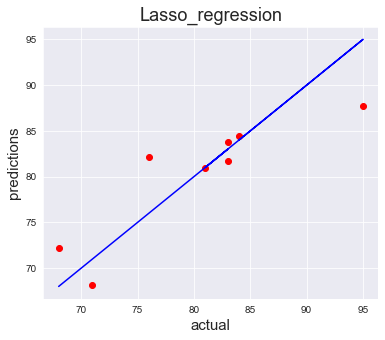

In [87]:
ls = Lasso()
ls.fit(x_train, y_train)
pred_test = ls.predict(x_test)
pred_train = ls.predict(x_train)
print('===scores for training set===')
print('r2 score for training set', r2_score(y_train, pred_train))
print('MAE for training set: ', mean_absolute_error(y_train, pred_train))
print('MSE for training set: ', mean_squared_error(y_train, pred_train))
print('SMSE for training set: ', np.sqrt(mean_squared_error(y_train, pred_train)))
print(' ')
print('===scores for testing set===')
print('r2 score for testing set : ', r2_score(y_test, pred_test))
print('MAE for testing set: ', mean_absolute_error(y_test, pred_test))
print('MSE for testing set: ', mean_squared_error(y_test, pred_test))
print('SMSE for testing set: ', np.sqrt(mean_squared_error(y_test, pred_test)))
plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=pred_test, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('Lasso_regression', fontsize = 18)
plt.show()

## Cross validation of the model

In [88]:
train_accuracy = r2_score(y_train, pred_train)
test_accuracy = r2_score(y_test, pred_test)
for j in range(3,13):
    cv_score = cross_val_score(ls, X_scaled, y, cv = j)
    cv_mean = cv_score.mean()
    print(f'at cv = {j}, cv_score is {cv_mean}, train_accu is {train_accuracy}, test_accu is {test_accuracy} \n')

at cv = 3, cv_score is 0.41292184473556665, train_accu is 0.827429757168769, test_accu is 0.7617916794210505 

at cv = 4, cv_score is 0.5118701505245999, train_accu is 0.827429757168769, test_accu is 0.7617916794210505 

at cv = 5, cv_score is -0.10161331744085252, train_accu is 0.827429757168769, test_accu is 0.7617916794210505 

at cv = 6, cv_score is 0.17625473188123295, train_accu is 0.827429757168769, test_accu is 0.7617916794210505 

at cv = 7, cv_score is -0.15556481359764193, train_accu is 0.827429757168769, test_accu is 0.7617916794210505 

at cv = 8, cv_score is 0.13226522363524185, train_accu is 0.827429757168769, test_accu is 0.7617916794210505 

at cv = 9, cv_score is -9.880274735056929, train_accu is 0.827429757168769, test_accu is 0.7617916794210505 

at cv = 10, cv_score is -5.9750653107181275, train_accu is 0.827429757168769, test_accu is 0.7617916794210505 

at cv = 11, cv_score is -6.049438824160519, train_accu is 0.827429757168769, test_accu is 0.7617916794210505 



In [89]:
cross_val_score(ls, X_scaled, y, cv = 3, scoring ='r2').mean()

0.41292184473556665

##  Ridge algorithm..

In [90]:
rd = Ridge()
train = []
test = []
diff = []
randomstate = []
for i in range(0, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = i)
    rd.fit(x_train, y_train)
    pred_train = rd.predict(x_train)
    pred_test = rd.predict(x_test)

    train.append(r2_score(y_train, pred_train))
    test.append(r2_score(y_test, pred_test))
    diff.append(r2_score(y_train, pred_train) - r2_score(y_test, pred_test))
    randomstate.append(i)
    
table = pd.DataFrame(list(zip(randomstate, train, test, diff)),
                              columns =['randomstate', 'train_score', 'test_score', 'diff_score'])
#                               index=pd.RangeIndex(start=1, stop=(len(randomstate)+1), name='Sr. No.'))

In [94]:
table[(-0.2< table['diff_score']) & (table['diff_score'] < 0.2)].sort_values(by=['diff_score', 'train_score', 'test_score'])

,randomstate,train_score,test_score,diff_score
53,53,0.854234,0.852045,0.002190
50,50,0.852022,0.814150,0.037872
28,28,0.851468,0.801083,0.050385
32,32,0.838937,0.784830,0.054107
96,96,0.833468,0.765004,0.068464
44,44,0.886179,0.799215,0.086964
67,67,0.843050,0.750540,0.092510
8,8,0.898585,0.793028,0.105557
97,97,0.856714,0.746720,0.109994
7,7,0.853686,0.732447,0.121240


## best random is 53 for spliting

In [95]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, random_state=53, test_size=.25)

===scores for training set===
r2 score for training set 0.8542343613128178
MAE for training set:  3.2238181682273237
MSE for training set:  14.944118041553024
SMSE for training set:  3.8657622846668964
 
===scores for testing set===
r2 score for testing set :  0.8520445571794644
MAE for testing set:  3.5241356890802145
MSE for testing set:  15.674029723800494
SMSE for testing set:  3.9590440416596144


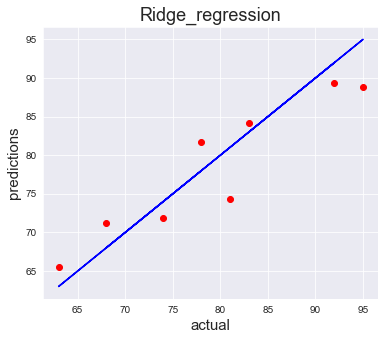

In [96]:
rd = Ridge()
rd.fit(x_train, y_train)
pred_test = rd.predict(x_test)
pred_train = rd.predict(x_train)
print('===scores for training set===')
print('r2 score for training set', r2_score(y_train, pred_train))
print('MAE for training set: ', mean_absolute_error(y_train, pred_train))
print('MSE for training set: ', mean_squared_error(y_train, pred_train))
print('SMSE for training set: ', np.sqrt(mean_squared_error(y_train, pred_train)))
print(' ')
print('===scores for testing set===')
print('r2 score for testing set : ', r2_score(y_test, pred_test))
print('MAE for testing set: ', mean_absolute_error(y_test, pred_test))
print('MSE for testing set: ', mean_squared_error(y_test, pred_test))
print('SMSE for testing set: ', np.sqrt(mean_squared_error(y_test, pred_test)))
plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=pred_test, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('Ridge_regression', fontsize = 18)
plt.show()

## Cross validation of the model

In [97]:
train_accuracy = r2_score(y_train, pred_train)
test_accuracy = r2_score(y_test, pred_test)
for j in range(3,13):
    cv_score = cross_val_score(rd, X_scaled, y, cv = j)
    cv_mean = cv_score.mean()
    print(f'at cv = {j}, cv_score is {cv_mean}, train_accu is {train_accuracy}, test_accu is {test_accuracy} \n')

at cv = 3, cv_score is -0.0318520825966507, train_accu is 0.8542343613128178, test_accu is 0.8520445571794644 

at cv = 4, cv_score is 0.1656711135782342, train_accu is 0.8542343613128178, test_accu is 0.8520445571794644 

at cv = 5, cv_score is -0.12366776106652089, train_accu is 0.8542343613128178, test_accu is 0.8520445571794644 

at cv = 6, cv_score is -0.10410520417233649, train_accu is 0.8542343613128178, test_accu is 0.8520445571794644 

at cv = 7, cv_score is -0.4539244717459278, train_accu is 0.8542343613128178, test_accu is 0.8520445571794644 

at cv = 8, cv_score is -0.1298641211916169, train_accu is 0.8542343613128178, test_accu is 0.8520445571794644 

at cv = 9, cv_score is -15.30391061623132, train_accu is 0.8542343613128178, test_accu is 0.8520445571794644 

at cv = 10, cv_score is -5.62510246644381, train_accu is 0.8542343613128178, test_accu is 0.8520445571794644 

at cv = 11, cv_score is -6.274179577399661, train_accu is 0.8542343613128178, test_accu is 0.852044557179